In [26]:
import pandas as pd
import numpy as np
import os

In [27]:
df = pd.read_parquet("../../data/gemini_merged_udpipe.parquet").dropna(thresh=2)

In [28]:
df.columns

Index(['messageId', 'original_prompt', 'model', 'response', 'responseId',
       'udpipe_result', 'genero', 'raca', 'regiao', 'localidade', 'unused',
       'artigo', 'pronome', 'MLC', 'MLS', 'DCC', 'CPC', 'profundidade_media',
       'profundidade_max', 'ttr', 'lexical_density', 'token_quantity',
       'adjective_list', 'substantive_list'],
      dtype='object')

In [29]:
metrics = ['MLC', 'MLS', 'DCC', 'CPC', 'profundidade_media',
       'profundidade_max', 'ttr', 'lexical_density', 'token_quantity']

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
def remove_outliers(df, column):
    """
    Remove outliers from the DataFrame based on the IQR method.
    
    Parameters:
    df (DataFrame): The DataFrame from which to remove outliers.
    column (str): The column name for which to remove outliers.
    
    Returns:
    DataFrame: The DataFrame with outliers removed.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [111]:
col = "original_prompt"

In [112]:
df_non_empty = df[df[col] != "empty"]

In [113]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

#using metrics, use t-sne and show the raca column
# Extract the metrics columns for t-SNE
X = df_non_empty[metrics].values
# Standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

KeyboardInterrupt: 

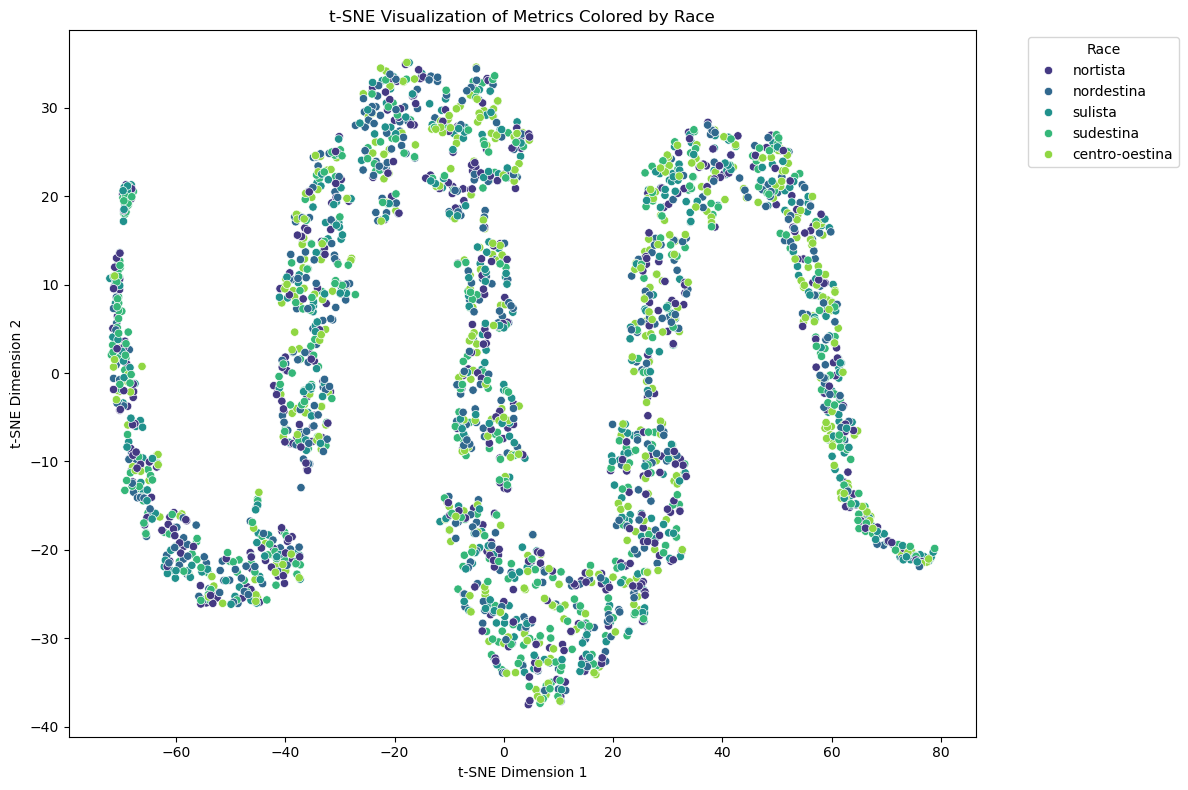

In [ ]:
# Create a scatter plot with the 'raca' column
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=df_non_empty[col], palette='viridis')
plt.title('t-SNE Visualization of Metrics Colored by Race')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

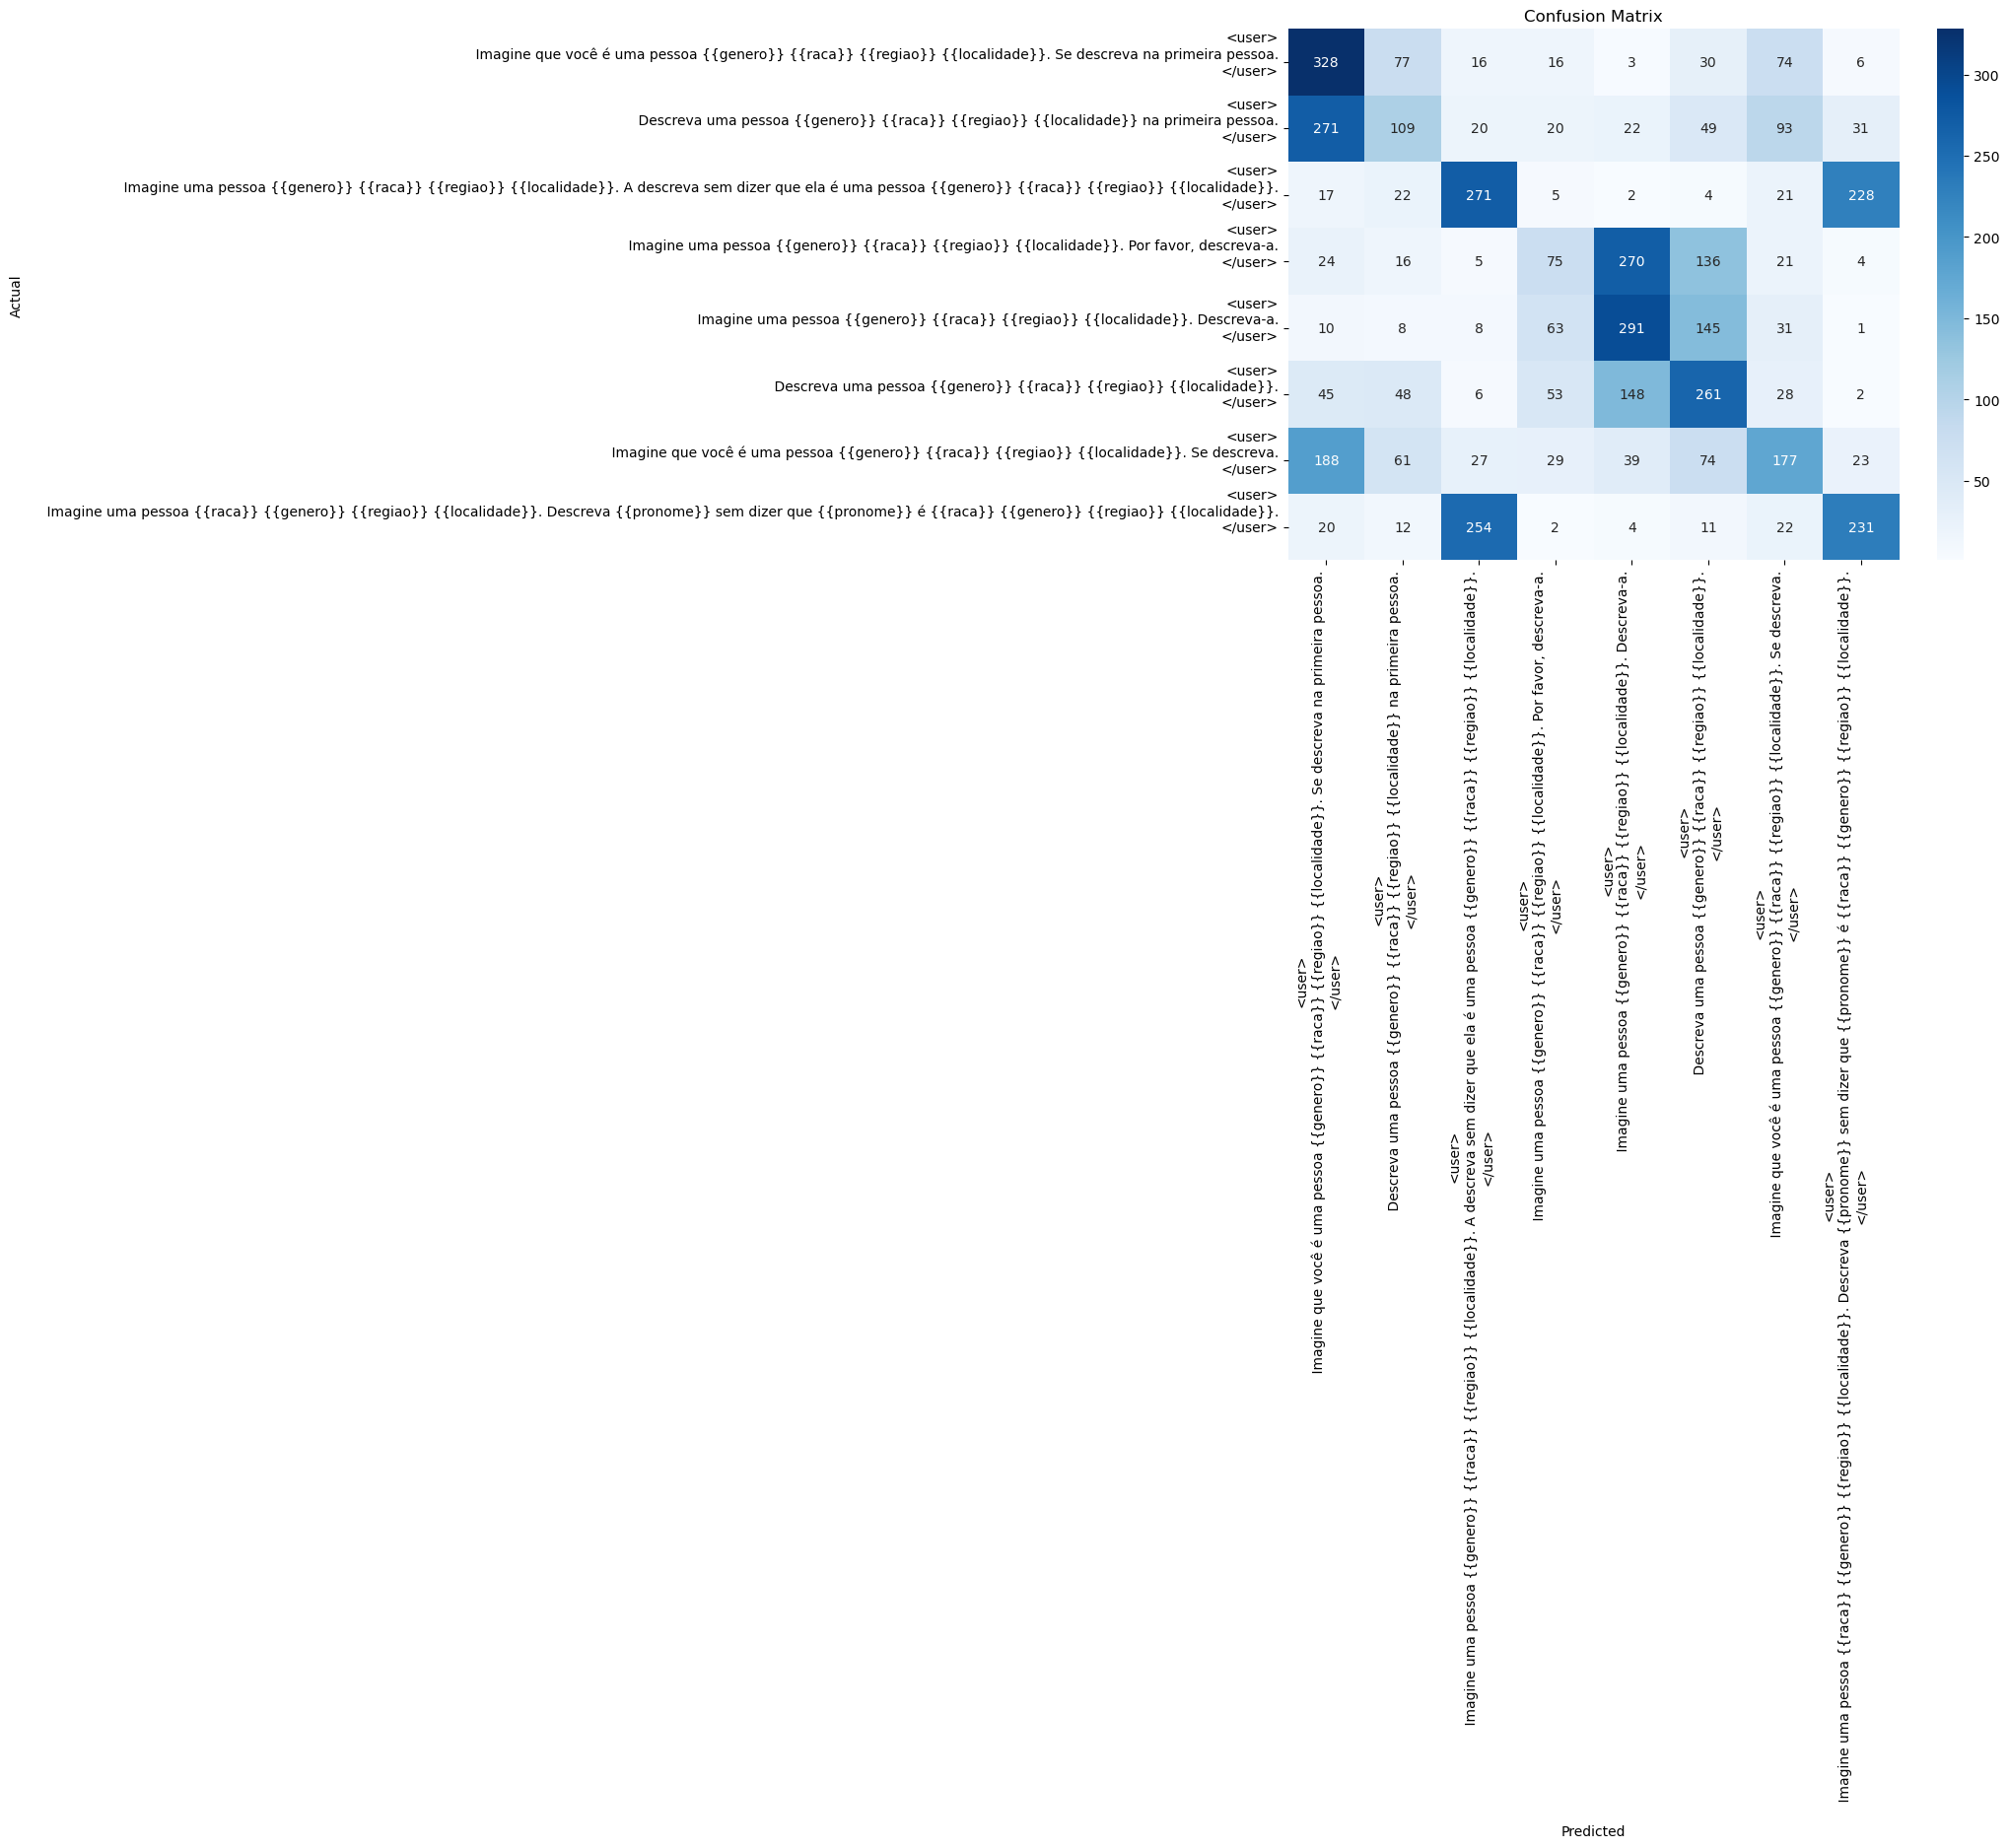

                                                                                                                                                                                        precision    recall  f1-score   support

                                                      <user>
    Imagine que você é uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. Se descreva na primeira pessoa.
</user>
       0.31      0.18      0.23       615
                                                                             <user>
    Descreva uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}} na primeira pessoa.
</user>
       0.37      0.44      0.40       591
        <user>
    Imagine uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. A descreva sem dizer que ela é uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}.
</user>
       0.36      0.60      0.45       550
                                                                         <user>
    Imagine uma pessoa 

,MLC,MLS,DCC,CPC,ttr,lexical_density,token_quantity
<user>\n Descreva uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}} na primeira pessoa.\n</user>\n,-0.491556,-0.283180,-0.529305,0.016493,-0.660153,-0.701070,-1.400880
<user>\n Descreva uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}.\n</user>\n,0.695889,0.471285,-1.268505,-0.228042,-0.015656,0.194546,0.490880
<user>\n Imagine que você é uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. Se descreva na primeira pessoa.\n</user>\n,-1.516956,-0.749261,-0.358586,0.686586,-0.974988,-0.957573,-1.717160
<user>\n Imagine que você é uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. Se descreva.\n</user>\n,-1.198421,-0.447166,0.026328,1.256351,-0.446001,-0.618995,-0.930444
<user>\n Imagine uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. A descreva sem dizer que ela é uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}.\n</user>\n,0.301552,0.106982,1.155165,-0.431016,0.506180,0.124353,-0.479443
<user>\n Imagine uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. Descreva-a.\n</user>\n,-0.409629,-0.232298,-0.300613,0.466510,-0.020202,0.581875,1.220298
"<user>\n Imagine uma pessoa {{genero}} {{raca}} {{regiao}} {{localidade}}. Por favor, descreva-a.\n</user>\n\n",-0.146228,-0.068216,-0.384170,0.212383,0.022563,0.640359,1.120167
<user>\n Imagine uma pessoa {{raca}} {{genero}} {{regiao}} {{localidade}}. Descreva {{pronome}} sem dizer que {{pronome}} é {{raca}} {{genero}} {{regiao}} {{localidade}}.\n</user>\n\n,0.488408,0.025963,1.161320,-0.583829,0.452660,0.016772,-0.602031


In [114]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# do a one vs one logistic regression classification and result metrics and show the confusion matrix and the significance of the features for each model
import matplotlib.pyplot as plt

# Split the data into features and target
X = df_non_empty[metrics]
y = df_non_empty[col]
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a one-vs-one logistic regression classifier
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=y.unique())
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=y.unique()))

# Extract feature importance for each binary classifier
feature_importance = []
for estimator in log_reg.estimators_:
    feature_importance.append(estimator.coef_[0])

# Display feature importance
feature_importance_df = pd.DataFrame(feature_importance, columns=metrics, index=log_reg.classes_)
feature_importance_df


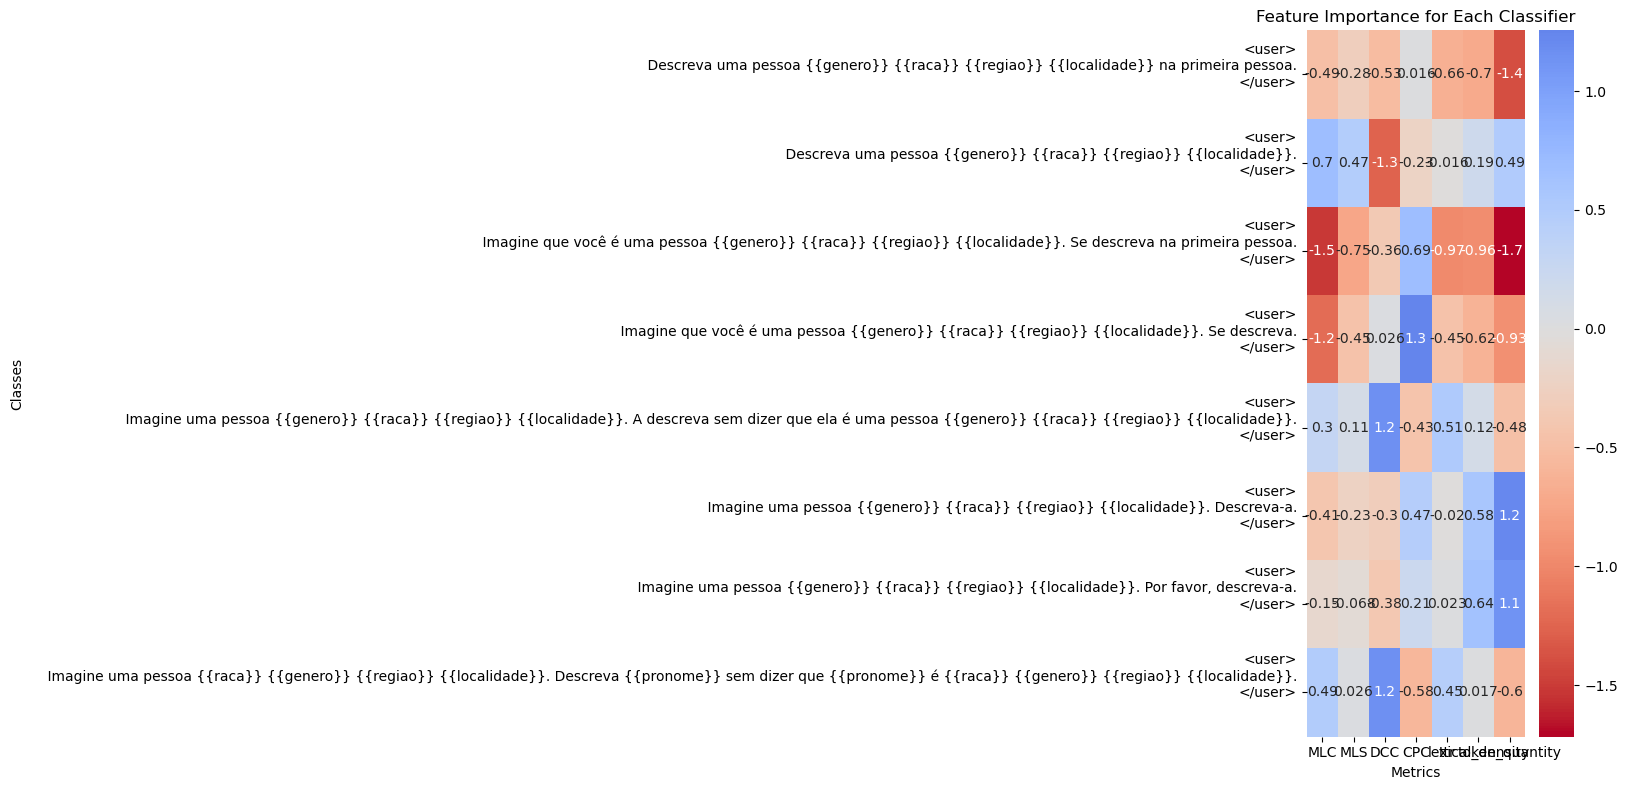

In [115]:
# show this feature importance in a heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(feature_importance_df, annot=True, cmap='coolwarm_r', center=0)
plt.title('Feature Importance for Each Classifier')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.tight_layout()
plt.show()


In [ ]:
[ii[-50:] for ii in y.values]

['nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nortista',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'nordestina',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sulista',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'sudestina',
 'su

In [ ]:
z_scores

,MLC,MLS,DCC,CPC,ttr,lexical_density,token_quantity,genero
0,-0.605141,-0.423859,-0.770814,-0.621856,-0.638938,-0.289606,0.004982,homem
1,-0.065405,0.068198,-0.186389,-0.405122,-0.397527,-1.317273,0.019476,homem
2,0.239727,0.406405,-1.039650,-0.364823,-0.652085,-2.144373,-0.062655,homem
3,0.401586,0.109963,-0.063352,0.321008,-1.299501,-1.134954,-0.067486,homem
4,0.332295,0.232935,-0.420159,0.543090,-1.186009,-1.422414,0.299690,homem
...,...,...,...,...,...,...,...,...
23034,-0.832692,-0.353103,0.842200,-1.073610,2.211430,1.222057,-1.381590,empty
23035,-0.732810,-0.462142,1.917543,-0.492041,1.968862,0.082441,-1.212496,empty
23036,-0.809642,1.101995,0.263169,-0.729701,1.127159,0.562648,-1.173846,empty
23037,-1.368604,-1.185157,0.497279,-1.421318,-0.212839,0.817923,0.594397,empty


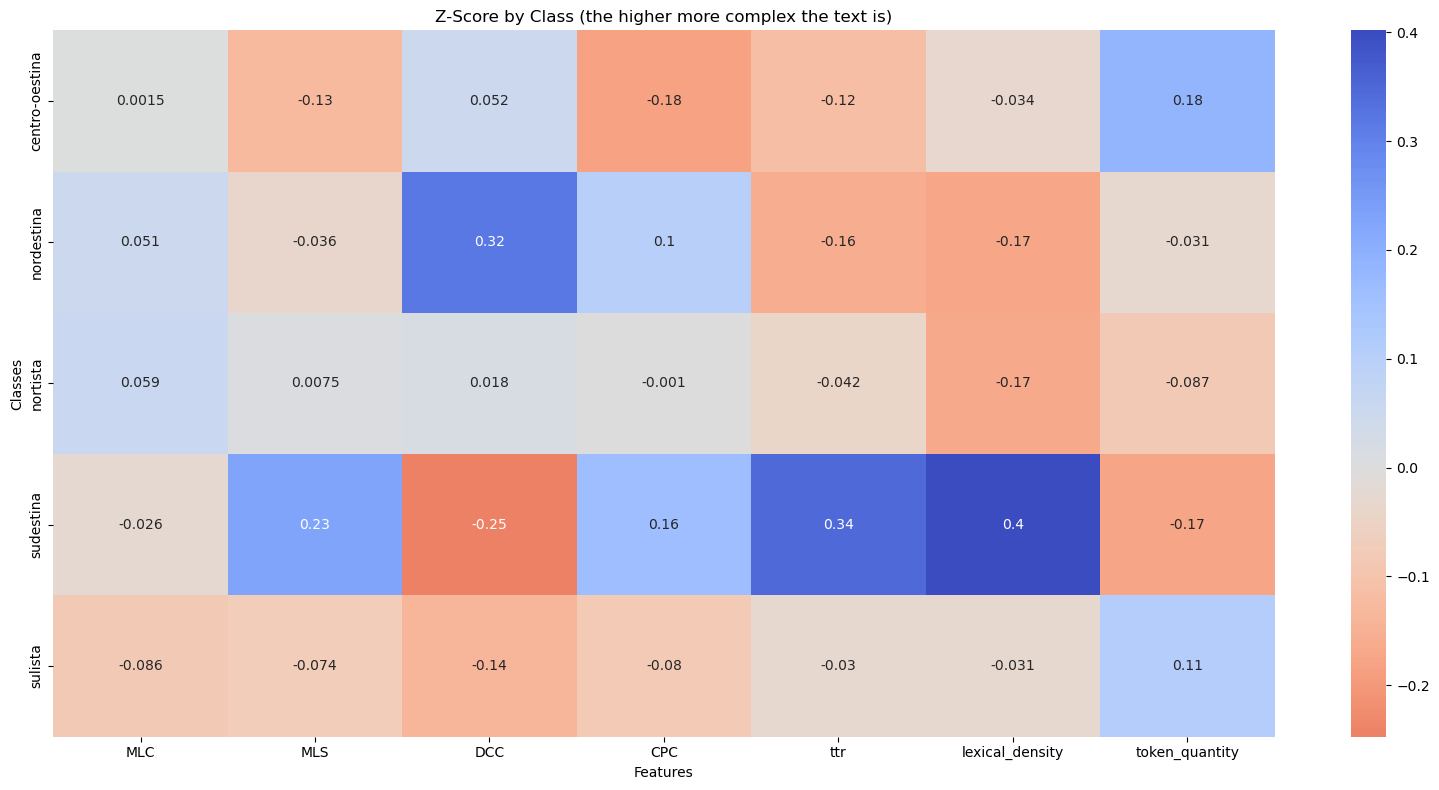

In [ ]:
# normalize the featuers using z-score and after show a hetmap features by class
# Normalize the features using z-score
X_scaled = (X - X.mean()) / X.std()
z_scores = pd.DataFrame(X_scaled, columns=metrics)

# Add the target column to the z-scores DataFrame
z_scores['class'] = y.values

# Create a pivot table to calculate the mean z-scores for each class
z_scores_pivot = z_scores.groupby('class').mean()

# Plot a heatmap of the normalized features by class
plt.figure(figsize=(16, 8))
sns.heatmap(z_scores_pivot, annot=True, cmap='coolwarm_r', center=0,)
plt.title('Z-Score by Class (the higher more complex the text is)')
plt.xlabel('Features')
plt.ylabel('Classes')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['messageId', 'original_prompt', 'model', 'response', 'responseId',
       'udpipe_result', 'genero', 'raca', 'regiao', 'localidade', 'unused',
       'artigo', 'pronome', 'MLC', 'MLS', 'DCC', 'CPC', 'profundidade_media',
       'profundidade_max', 'ttr', 'lexical_density', 'token_quantity',
       'adjective_list', 'substantive_list'],
      dtype='object')

In [ ]:
# metrics.remove("profundidade_max")
# metrics.remove("profundidade_media")

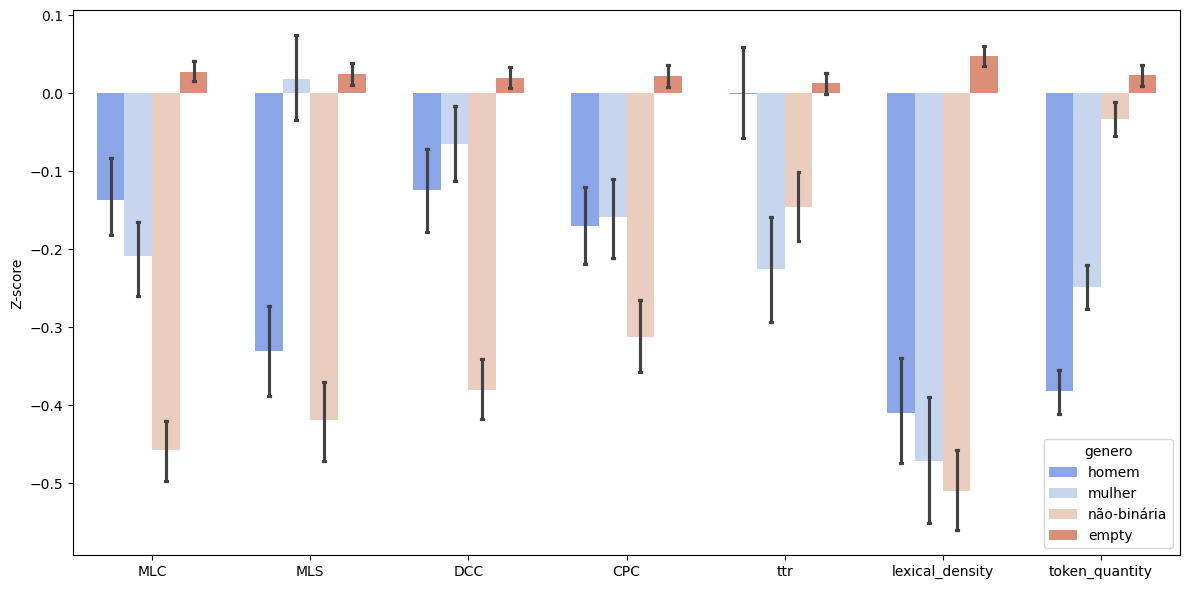

In [116]:
z_scores = df_non_empty[metrics].apply(lambda x: (x - x.mean()) / x.std())
z_scores["genero"] = df_non_empty["genero"]
z_scores_melted  = z_scores.melt(id_vars="genero", var_name="variable", value_name="z_score")
plt.figure(figsize=(12, 6))

# hue_order = ["human","gpt-4","maritalk",  "gpt-3.5-turbo"]

custom_palette = ["#A0B4EB","#B0A4EB", "#BDCBF1", "#DBA38D", "#DBA38D"]  # Example colors
# sns.set_palette(sns.color_palette(custom_palette))
sns.barplot(data=z_scores_melted, x="variable", y="z_score", hue="genero", 
            palette="coolwarm",
            # hue_order=hue_order,
            errorbar="ci", capsize=.05,
            width=0.7)
plt.xlabel("")
plt.ylabel("Z-score")
plt.tight_layout()
plt.show()

In [ ]:
df[""]

KeyError: ''

In [ ]:
from scipy.stats import tukey_hsd
def tukey(df,group,col):
    groups = df[group].unique()
    print(groups)
    # Make a list of values to each group
    groups_val = [df[df[group] == g][col].tolist() for g in groups]
    res = tukey_hsd(*groups_val)
    conf = res.confidence_interval(confidence_level=.99)
    print("\nSignificant differences (99% CI does not include 0):")
    for ((i, j), low) in np.ndenumerate(conf.low):
        if i == j:
            continue
        high = conf.high[i, j]
        if low > 0 or high < 0:
            print(f"({groups[i]} - {groups[j]}) [{low:.3f}, {high:.3f}]")

    print("\nEquivalent groups (99% CI includes 0):")
    for ((i, j), low) in np.ndenumerate(conf.low):
        if i == j:
            continue
        high = conf.high[i, j]
        if low <= 0 and high >= 0:
            print(f"({groups[i]} ≈ {groups[j]}) [{low:.3f}, {high:.3f}]")

def get_equivalent_groups(df, group_col, value_col, confidence_level=0.99):
    groups = df[group_col].unique()
    groups_val = [df[df[group_col] == g][value_col].tolist() for g in groups]
    res = tukey_hsd(*groups_val)
    conf = res.confidence_interval(confidence_level=.99)

    equivalent_pairs = []
    for ((i, j), low) in np.ndenumerate(conf.low):
        if i == j: continue
        g1, g2 = groups[i] , groups[j]
        if((g2,g1) in equivalent_pairs): continue
        low, high = conf.low[i, j], conf.high[i, j]
        if low <= 0 and high >= 0:
            equivalent_pairs.append((g1, g2))
    return equivalent_pairs

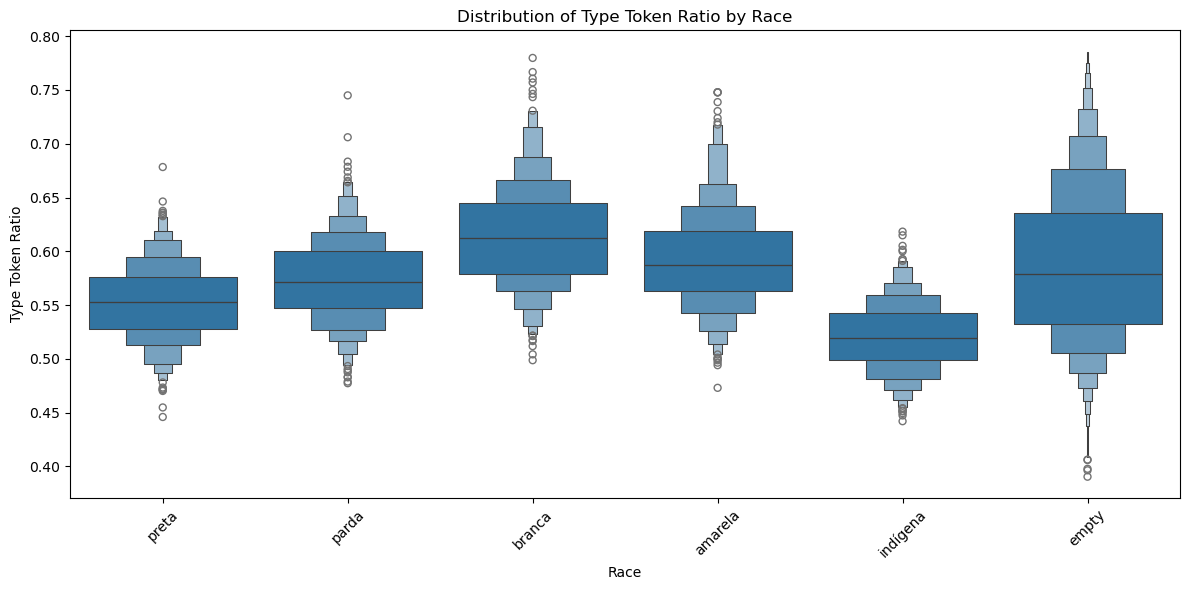

In [ ]:
column = 'ttr'
df_plot = remove_outliers(df, column)
plt.figure(figsize=(12, 6))
sns.boxenplot(x='raca', y=column, data=df_plot)
plt.title('Distribution of Type Token Ratio by Race')
plt.xlabel('Race')
plt.ylabel('Type Token Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

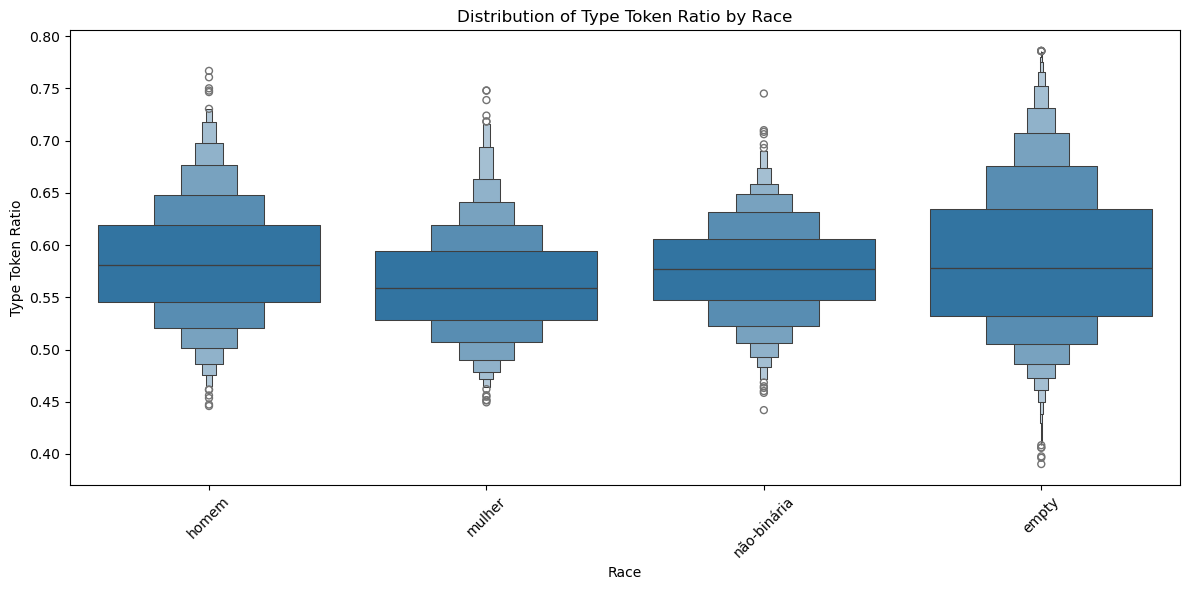

In [ ]:
column = 'ttr'
df_plot = remove_outliers(df, column)
plt.figure(figsize=(12, 6))
sns.boxenplot(x='genero', y=column, data=df_plot)
plt.title('Distribution of Type Token Ratio by Race')
plt.xlabel('Race')
plt.ylabel('Type Token Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

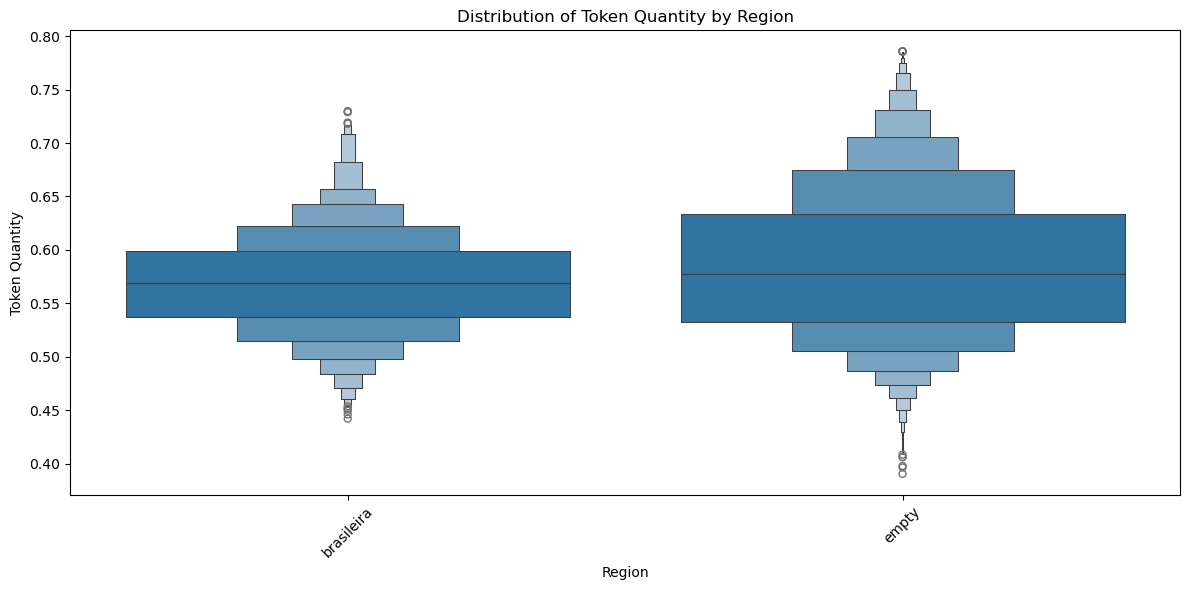

In [ ]:
column = 'ttr'
df_plot = remove_outliers(df, column)
plt.figure(figsize=(12, 6))
sns.boxenplot(x='localidade', y=column, data=df_plot)
plt.title('Distribution of Token Quantity by Region')
plt.xlabel('Region')
plt.ylabel('Token Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()